In [52]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (24,12)

In [54]:
#load data
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [55]:
#convert data
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [56]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

In [57]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
9603,9604,3,1,3,57,0,0,0,0,0,0,0,0,0,7,1,1,0,0,0,0,26,24,0,0,0,0,0.000000,0.0,0,1,1,0,1,0.0,0,0,0,0,1,0,0,1,1,0,1,-1,1,1,0
4284,4285,3,1,3,44,1,0,0,0,0,0,0,0,0,5,1,1,0,0,0,0,18,19,0,0,0,0,1.000000,1.0,0,1,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,1,-1,1
2603,2604,4,0,2,71,0,0,0,0,0,0,1,0,0,14,1,0,0,0,0,0,10,20,33,0,0,0,0.857143,1.0,1,1,0,0,0,0.0,1,0,0,0,0,1,0,0,1,0,-1,1,-1,-1,1
2007,2008,2,0,6,63,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,12,44,0,0,0,0,0.000000,0.0,0,1,1,0,0,0.0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1
1596,1597,2,0,2,39,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,15,17,0,0,0,0,0.923077,1.0,0,1,0,0,0,0.0,1,0,0,0,0,0,0,0,1,1,1,1,-1,-1,1


In [58]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136135,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342363,0.387295,0.373173,0.362873,0.432281,0.3024,0.232997,0.312426,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

<AxesSubplot:>

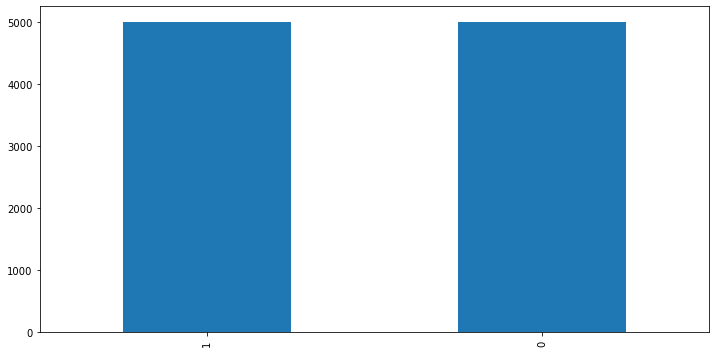

In [59]:
#check target variable balance
data['labels'].value_counts().plot(kind='bar')

In [60]:
#Spearman Correlation
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

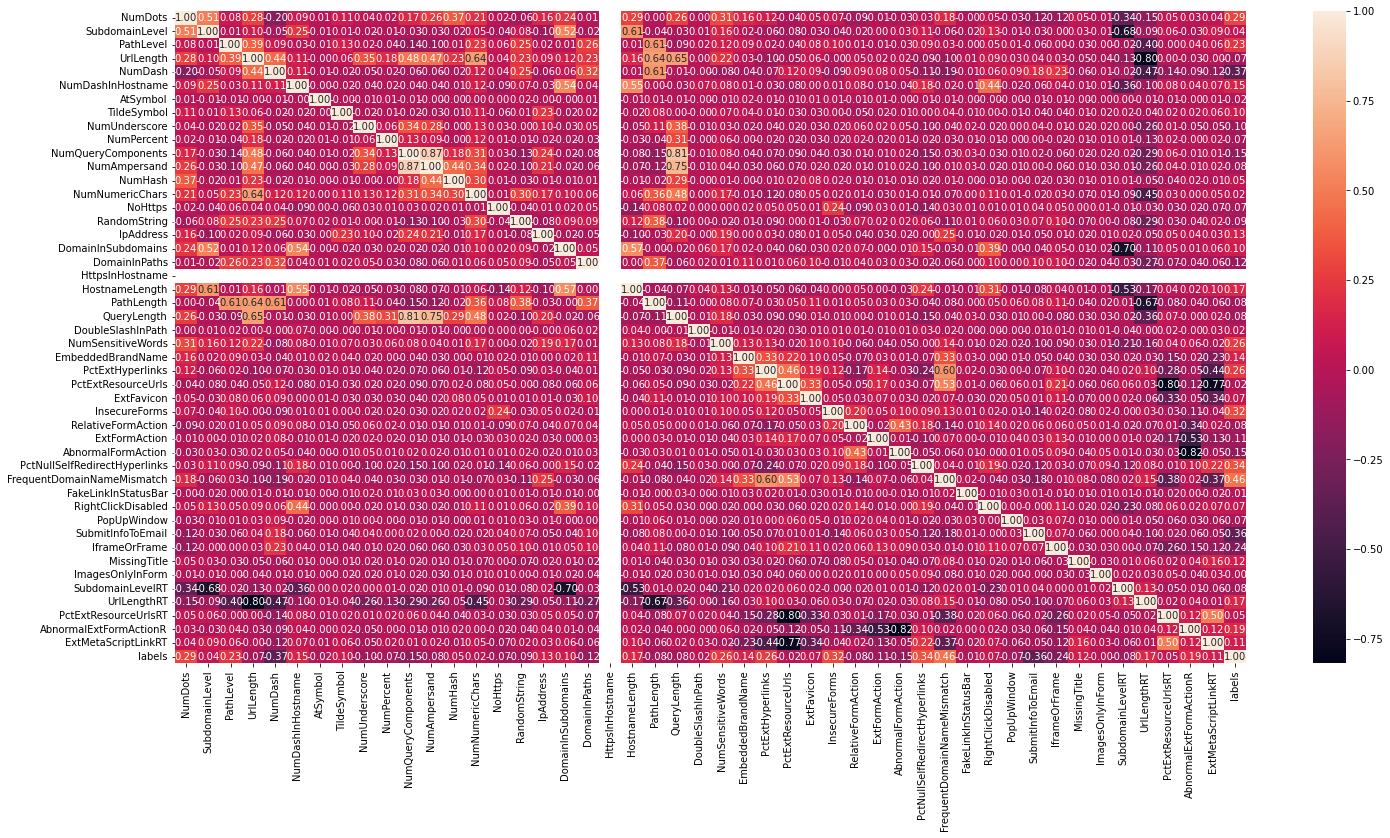

In [91]:
corr_heatmap(data, 0, 48)

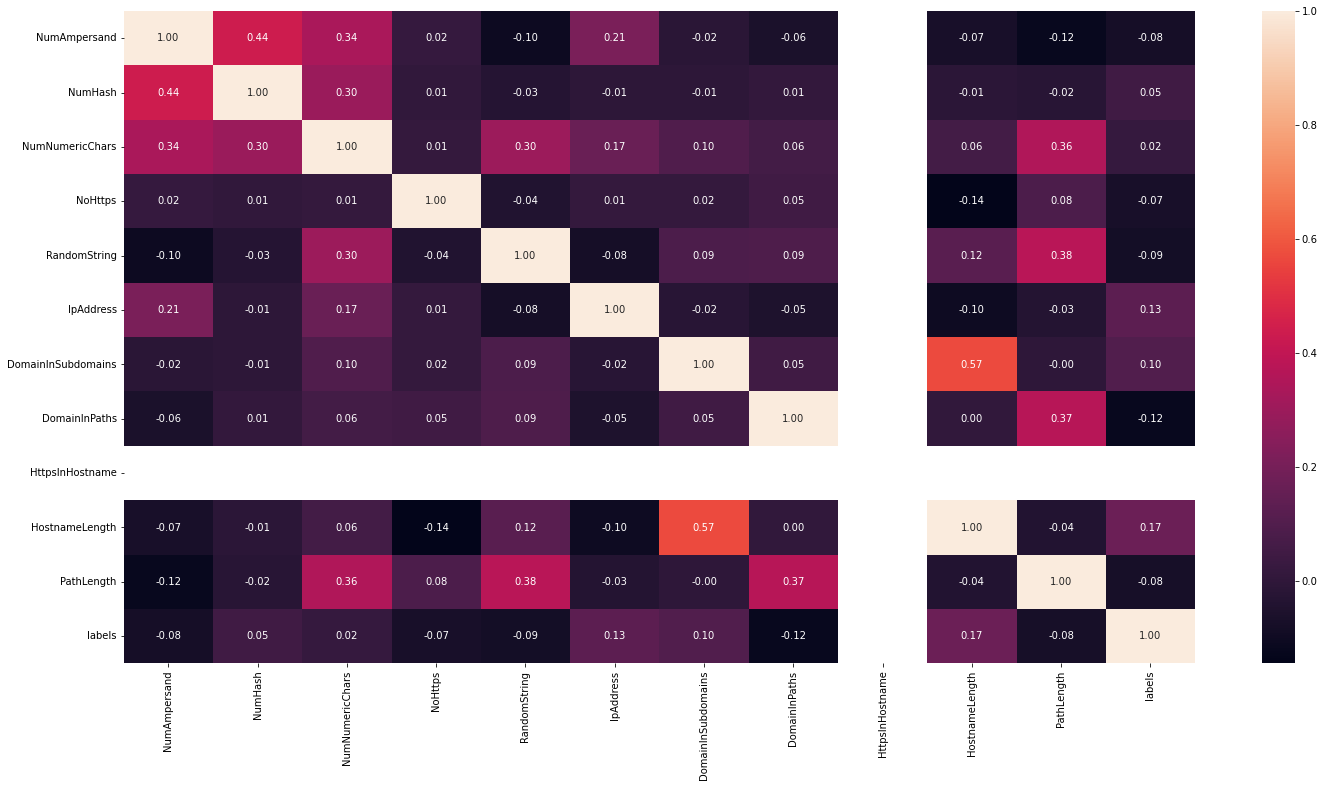

In [81]:
corr_heatmap(data, 12, 23)

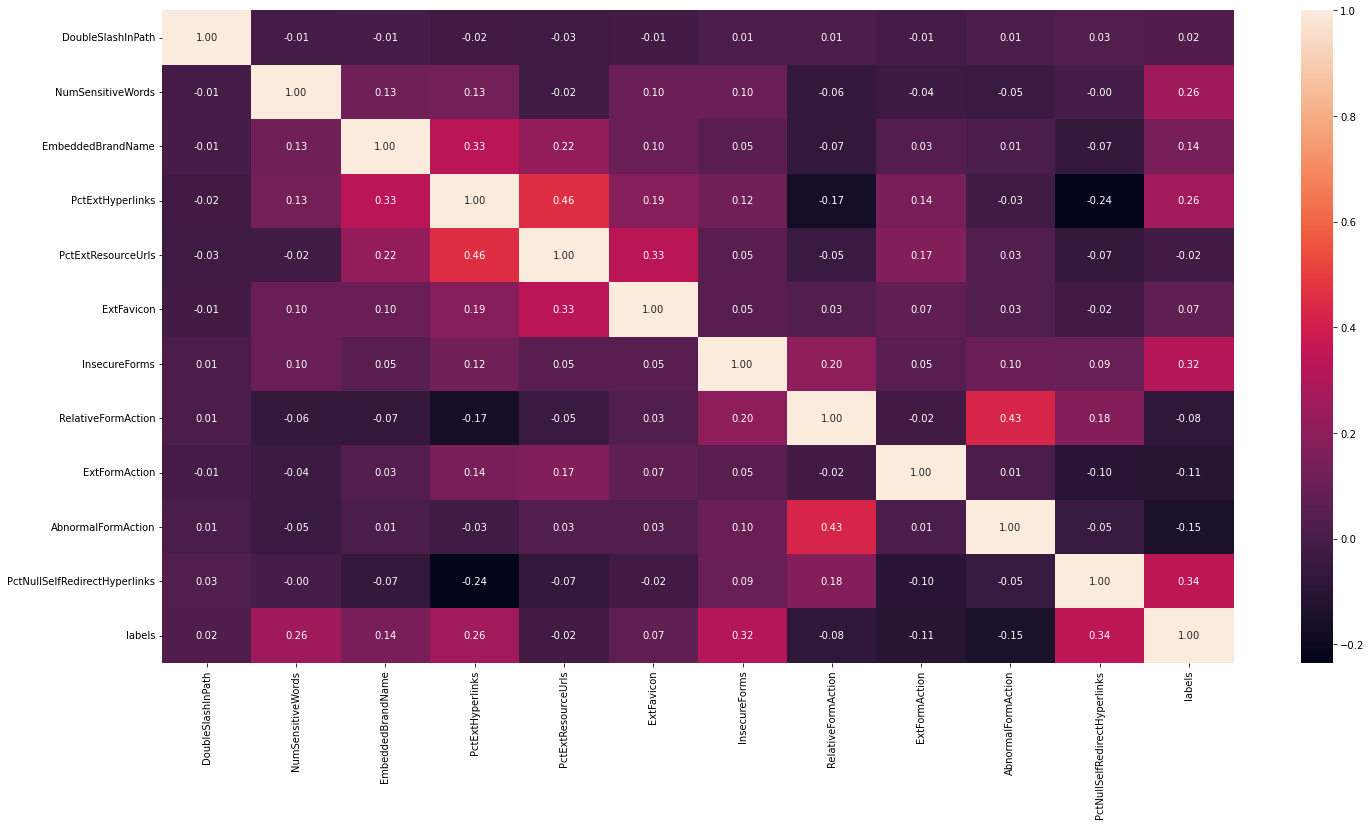

In [87]:
corr_heatmap(data, 24, 35)

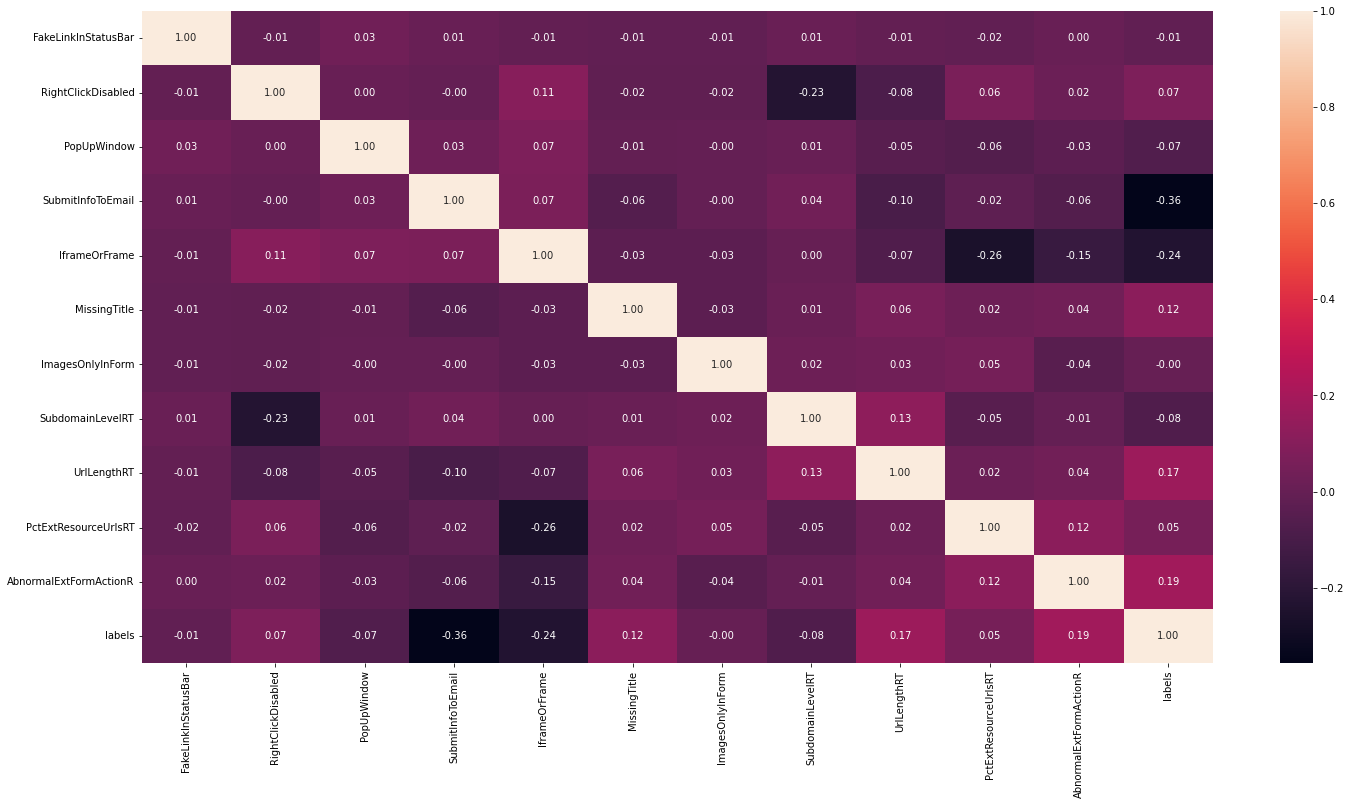

In [88]:
corr_heatmap(data, 36, 47)

In [17]:
#Mutual Info
from sklearn.feature_selection import mutual_info_classif

In [18]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [19]:
discrete_features = X.dtypes == int

In [20]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.465766
PctExtResourceUrls                    0.291177
PctNullSelfRedirectHyperlinks         0.238782
PctExtNullSelfRedirectHyperlinksRT    0.211841
NumNumericChars                       0.132793
FrequentDomainNameMismatch            0.126586
ExtMetaScriptLinkRT                   0.118704
NumDash                               0.112217
SubmitInfoToEmail                     0.078001
NumDots                               0.067543
InsecureForms                         0.054397
PathLength                            0.054282
PathLevel                             0.047349
QueryLength                           0.046697
NumSensitiveWords                     0.037392
UrlLength                             0.036602
HostnameLength                        0.031454
IframeOrFrame                         0.029066
AbnormalExtFormActionR                0.024559
EmbeddedBrandName                     0.023720
PctExtResourceUrlsRT                  0.022582
NumQueryCompo

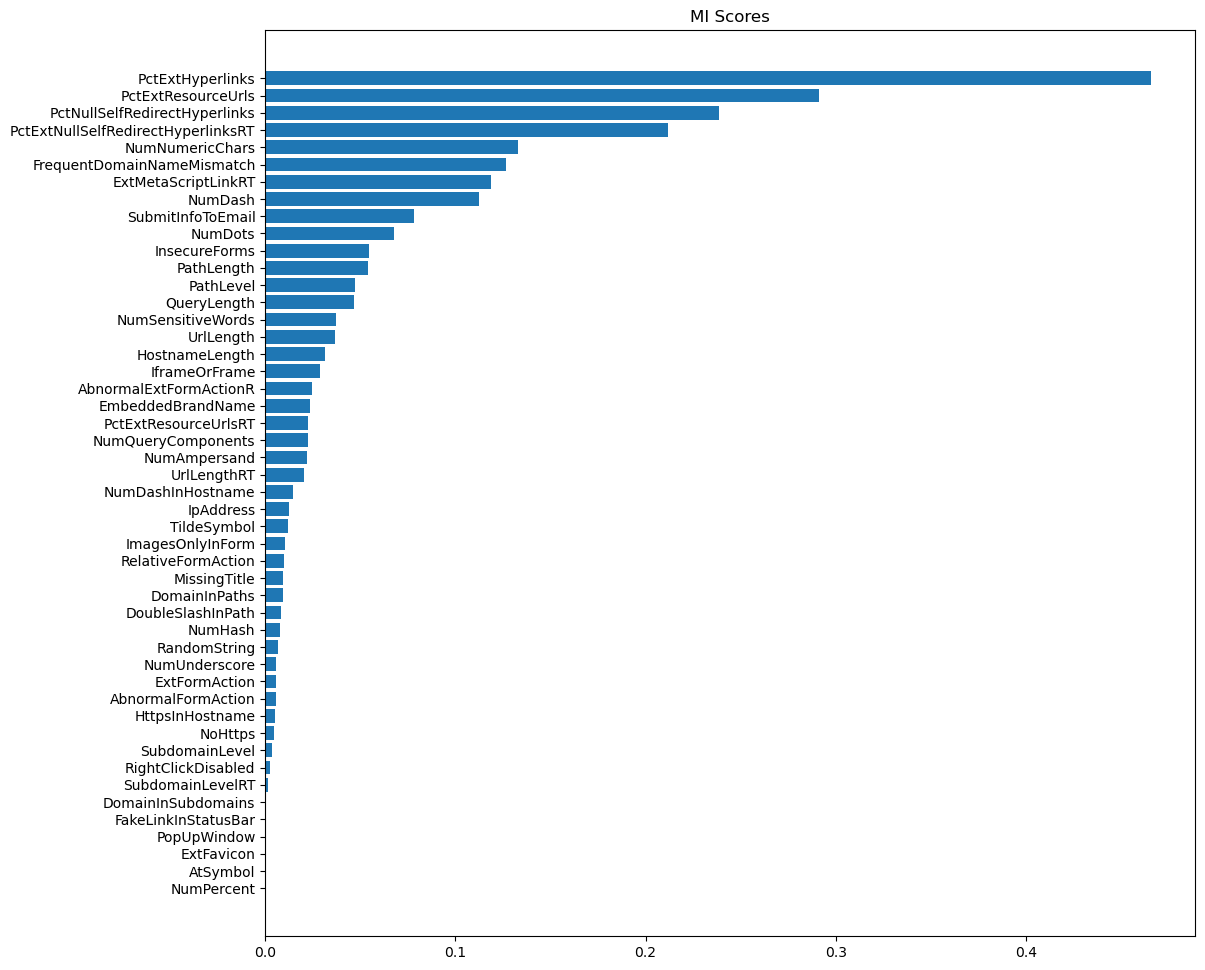

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [30]:
#Prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
#Train Log models
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [25]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9192118226600985, recall : 0.9405241935483871, f1 score : 0.9297458893871451, accuracy : 0.9295
Performance for Logistic Model with Top 21 features is precision : 0.9313346228239845, recall : 0.9385964912280702, f1 score : 0.9349514563106796, accuracy : 0.933
Performance for Logistic Model with Top 22 features is precision : 0.9094412331406551, recall : 0.9430569430569431, f1 score : 0.925944090240314, accuracy : 0.9245
Performance for Logistic Model with Top 23 features is precision : 0.9278846153846154, recall : 0.946078431372549, f1 score : 0.9368932038834952, accuracy : 0.935
Performance for Logistic Model with Top 24 features is precision : 0.9273797841020608, recall : 0.9384309831181727, f1 score : 0.9328726554787758, accuracy : 0.932
Performance for Logistic Model with Top 25 features is precision : 0.9373134328358209, recall : 0.933597621407334, f1 score : 0.93545183714002, accuracy : 0.935
Performance for Log

In [26]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.919212,0.940524,0.929746,0.9295
1,21,0.931335,0.938596,0.934951,0.9330
2,22,0.909441,0.943057,0.925944,0.9245
3,23,0.927885,0.946078,0.936893,0.9350
4,24,0.927380,0.938431,0.932873,0.9320
5,25,0.937313,0.933598,0.935452,0.9350
6,26,0.920570,0.947589,0.933884,0.9360
7,27,0.919722,0.944049,0.931727,0.9320
8,28,0.925743,0.928500,0.927119,0.9265
9,29,0.927866,0.945619,0.936658,0.9365


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

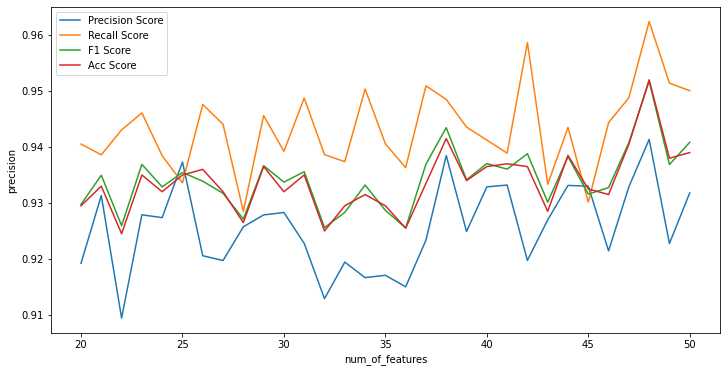

In [29]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [35]:
#Random Forest
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RandomForestClassifier(n_estimators=500, 
                #split_criterion=1,  
                max_depth=32, 
                #max_leaves=-1,
                max_features=1.0)
                #n_bins=128)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [36]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for RFC Model with Top 20 features is precision : 0.9789156626506024, recall : 0.9691848906560636, f1 score : 0.974025974025974, accuracy : 0.974
Performance for RFC Model with Top 21 features is precision : 0.9729187562688064, recall : 0.980788675429727, f1 score : 0.9768378650553878, accuracy : 0.977
Performance for RFC Model with Top 22 features is precision : 0.9708171206225681, recall : 0.9793915603532876, f1 score : 0.975085490962384, accuracy : 0.9745
Performance for RFC Model with Top 23 features is precision : 0.9678068410462777, recall : 0.9816326530612245, f1 score : 0.9746707193515703, accuracy : 0.975
Performance for RFC Model with Top 24 features is precision : 0.9687194525904204, recall : 0.9782823297137216, f1 score : 0.9734774066797641, accuracy : 0.973
Performance for RFC Model with Top 25 features is precision : 0.9758793969849247, recall : 0.9652087475149106, f1 score : 0.9705147426286856, accuracy : 0.9705
Performance for RFC Model with Top 26 features 

In [92]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df.head(50)

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.978916,0.969185,0.974026,0.9740
1,21,0.972919,0.980789,0.976838,0.9770
2,22,0.970817,0.979392,0.975085,0.9745
3,23,0.967807,0.981633,0.974671,0.9750
4,24,0.968719,0.978282,0.973477,0.9730
5,25,0.975879,0.965209,0.970515,0.9705
6,26,0.981595,0.971660,0.976602,0.9770
7,27,0.966281,0.980450,0.973314,0.9725
8,28,0.977863,0.983543,0.980695,0.9800
9,29,0.972277,0.976143,0.974206,0.9740


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

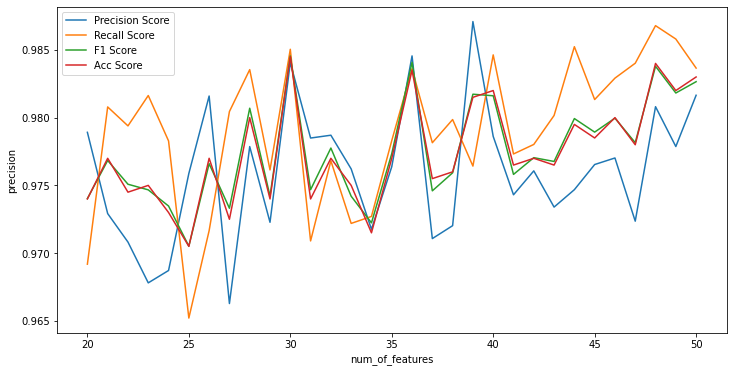

In [38]:
#Visualize RFC performance
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')


In [94]:
#Final Random Forest MOdel

top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = RandomForestClassifier(n_estimators=500, 
                #split_criterion=1,  
                max_depth=32, 
                #max_leaves=-1,
                max_features=1.0)
                #n_bins=128)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(30, precision, recall, f1, accuracy))

Performance for RFC Model with Top 30 features is precision : 0.9733727810650887, recall : 0.9762611275964391, f1 score : 0.9748148148148148, accuracy : 0.9745


In [51]:
#final Performance
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       994
           1       0.99      0.98      0.98      1006

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

